In [1]:
import pandas as pd
import numpy as np
import timeit as ti
import scipy

In [2]:
def read():
    data = pd.read_csv("household_power_consumption.txt", sep=";")
    data = data.replace('?', np.nan)
    data = data.dropna()
    return data

df_pd = read()
df_np = df_pd.to_numpy()

C:\Users\glebo\AppData\Local\Temp\ipykernel_21968\1648527001.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt", sep=";")


In [3]:
print(df_pd.head(10))
print(df_pd.columns)

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   
5  16/12/2006  17:29:00               3.520                 0.522  235.020   
6  16/12/2006  17:30:00               3.702                 0.520  235.090   
7  16/12/2006  17:31:00               3.700                 0.520  235.220   
8  16/12/2006  17:32:00               3.668                 0.510  233.990   
9  16/12/2006  17:33:00               3.662                 0.510  233.860   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1      

## Task 1: 
### Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [4]:
#task 1
df_pd['Global_active_power'] = df_pd['Global_active_power'].astype(float)
def gl_ac_pow_more_5kw_pd():
    return df_pd[df_pd['Global_active_power']>=5.0]

df_np[:, 2] = df_np[:, 2].astype(float)
def gl_ac_pow_more_5kw_np():
    return df_np[df_np[:, 2]>=5.0]


print("Execution time for task1 pandas: ", ti.timeit(gl_ac_pow_more_5kw_pd, number=10))
print("Execution time for task1 numpy: ", ti.timeit(gl_ac_pow_more_5kw_np, number=10))
print(gl_ac_pow_more_5kw_pd().head(10))
print(gl_ac_pow_more_5kw_np()[:10])

Execution time for task1 pandas:  0.07212330000766087
Execution time for task1 numpy:  0.3632030000007944
          Date      Time  Global_active_power Global_reactive_power  Voltage  \
1   16/12/2006  17:25:00                5.360                 0.436  233.630   
2   16/12/2006  17:26:00                5.374                 0.498  233.290   
3   16/12/2006  17:27:00                5.388                 0.502  233.740   
11  16/12/2006  17:35:00                5.412                 0.470  232.780   
12  16/12/2006  17:36:00                5.224                 0.478  232.990   
13  16/12/2006  17:37:00                5.268                 0.398  232.910   
20  16/12/2006  17:44:00                5.894                 0.000  232.690   
21  16/12/2006  17:45:00                7.706                 0.000  230.980   
22  16/12/2006  17:46:00                7.026                 0.000  232.210   
23  16/12/2006  17:47:00                5.174                 0.000  234.190   

   Global_int

## Task 2: 
### Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [5]:
#task 2
df_pd['Voltage'] = df_pd['Voltage'].astype(float)
def vol_more_235v_pd():
    return df_pd[df_pd['Voltage']>=235.0]

df_np[:, 4] = df_np[:, 4].astype(float)
def vol_more_235v_np():
    return df_np[df_np[:, 4]>=235.0]


print("Execution time for task2 pandas: ", ti.timeit(vol_more_235v_pd, number=10))
print("Execution time for task2 numpy: ", ti.timeit(vol_more_235v_np, number=10))
print(vol_more_235v_pd().head(10))
print(vol_more_235v_np()[:10])

Execution time for task2 pandas:  1.4942679999949178
Execution time for task2 numpy:  1.6116003000061028
          Date      Time  Global_active_power Global_reactive_power  Voltage  \
4   16/12/2006  17:28:00                3.666                 0.528   235.68   
5   16/12/2006  17:29:00                3.520                 0.522   235.02   
6   16/12/2006  17:30:00                3.702                 0.520   235.09   
7   16/12/2006  17:31:00                3.700                 0.520   235.22   
14  16/12/2006  17:38:00                4.054                 0.422   235.24   
15  16/12/2006  17:39:00                3.384                 0.282   237.14   
16  16/12/2006  17:40:00                3.270                 0.152   236.73   
17  16/12/2006  17:41:00                3.430                 0.156   237.06   
18  16/12/2006  17:42:00                3.266                 0.000   237.13   
19  16/12/2006  17:43:00                3.728                 0.000   235.84   

   Global_inte

## Task 3: 
### Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [6]:
#task 3
df_pd['Global_intensity'] = df_pd['Global_intensity'].astype(float)
df_pd['Sub_metering_2'] = df_pd['Sub_metering_2'].astype(float)
df_pd['Sub_metering_3'] = df_pd['Sub_metering_3'].astype(float)
def intensity_pd():
    df = df_pd[(df_pd['Global_intensity']>=19.0) & (df_pd['Global_intensity']<=20.0)]
    return df[df['Sub_metering_2']>df['Sub_metering_3']]

df_np[:, 7] = df_np[:, 7].astype(float)
df_np[:, 8] = df_np[:, 8].astype(float)
df_np[:, 5] = df_np[:, 5].astype(float)
def intensity_np():
    df = df_np[(df_np[:, 5]>=19.0) & (df_np[:, 5]<=20.0)]
    return df[df[:, 7]>df[:, 8]]


print("Execution time for task3 pandas: ", ti.timeit(intensity_pd, number=10))
print("Execution time for task3 numpy: ", ti.timeit(intensity_np, number=10))
print(intensity_pd().head(10))
print(intensity_np()[:10])

Execution time for task3 pandas:  0.169994099996984
Execution time for task3 numpy:  0.7109610000043176
            Date      Time  Global_active_power Global_reactive_power  \
45    16/12/2006  18:09:00                4.464                 0.136   
460   17/12/2006  01:04:00                4.582                 0.258   
464   17/12/2006  01:08:00                4.618                 0.104   
475   17/12/2006  01:19:00                4.636                 0.140   
476   17/12/2006  01:20:00                4.634                 0.152   
477   17/12/2006  01:21:00                4.652                 0.142   
508   17/12/2006  01:52:00                4.622                 0.240   
944   17/12/2006  09:08:00                4.762                 0.088   
945   17/12/2006  09:09:00                4.506                 0.088   
1051  17/12/2006  10:55:00                4.444                 0.136   

      Voltage  Global_intensity Sub_metering_1  Sub_metering_2  Sub_metering_3  
45     234.

## Task 4: 
### Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

In [7]:
#task4
#using pandas

df_pd['Sub_metering_1'] = df_pd['Sub_metering_1'].astype(float)

sampled_df = None

def sempling_and_ave_pd():
    global sampled_df
    sampled_df = df_pd.sample(n=500000, replace=False)
    means = sampled_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean(axis=1, numeric_only=False)
    result_df = sampled_df[['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    result_df.insert(2, 'Mean', means)
    return result_df
    
    
t4_pd_df = sempling_and_ave_pd()
print("Execution time for task4 pandas: ", ti.timeit(sempling_and_ave_pd, number=10))
print(t4_pd_df.head(10))
# print(sampled_df)

Execution time for task4 pandas:  2.822303200009628
               Date      Time       Mean  Sub_metering_1  Sub_metering_2  \
356550    21/8/2007  07:54:00   6.333333             0.0             0.0   
1614415   10/1/2010  20:19:00   6.000000             0.0             0.0   
205686     8/5/2007  13:30:00   5.666667             0.0             0.0   
1475891   6/10/2009  15:35:00   0.666667             0.0             1.0   
1256494    7/5/2009  06:58:00   6.666667             0.0             0.0   
596555     3/2/2008  23:59:00   0.000000             0.0             0.0   
272864    24/6/2007  05:08:00   0.000000             0.0             0.0   
962236   14/10/2008  22:40:00  12.666667            37.0             0.0   
1748093   13/4/2010  16:17:00  13.333333            39.0             1.0   
1942556   26/8/2010  17:20:00   0.333333             0.0             0.0   

         Sub_metering_3  
356550             19.0  
1614415            18.0  
205686             17.0  
1475891

In [8]:
# using numpy


def sampling_and_ave_np():
    sampled_indx = np.random.choice(df_np.shape[0], 500000)
    sampled_np_df = df_np[sampled_indx, :]
    sampled_np_df[:, 6] = sampled_np_df[:, 6].astype(float)
    
    means = np.mean(sampled_np_df[:, 6:9], axis=1)
    means = means.reshape(-1, 1)
    sampled_np_df = np.hstack((sampled_np_df[:, :2], means, sampled_np_df[:, 6:]))
    
    return sampled_np_df

t4_np_df = sampling_and_ave_np()
print("Execution time for task4 numpy: ", ti.timeit(sampling_and_ave_np, number=1))
print("First 10 elements of the result: \n", pd.DataFrame(t4_np_df[:10], columns=['Date', 'Time', 'Mean', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]))

Execution time for task4 numpy:  1.6532055999996373
First 10 elements of the result: 
          Date      Time      Mean Sub_metering_1 Sub_metering_2 Sub_metering_3
0   28/8/2007  15:06:00       0.0            0.0            0.0            0.0
1   29/6/2007  20:58:00  6.666667            0.0            2.0           18.0
2    3/5/2009  01:13:00  0.333333            0.0            0.0            1.0
3  17/12/2009  22:56:00  6.333333            0.0            0.0           19.0
4   10/1/2008  16:15:00  0.333333            0.0            1.0            0.0
5   7/10/2007  13:50:00       8.0            0.0            6.0           18.0
6   25/6/2009  08:11:00  6.333333            0.0            1.0           18.0
7   23/4/2010  21:06:00  0.333333            0.0            1.0            0.0
8   30/7/2007  19:07:00       0.0            0.0            0.0            0.0
9    5/7/2007  08:50:00  6.333333            0.0            1.0           18.0


##  Task 5: 
### Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [9]:
# using pandas

def task5_pd():
    over_6kV = t4_pd_df[(t4_pd_df['Mean'] >= 6.0) & ( t4_pd_df['Time'].str.split(':').str[0].astype(int)>= 18)]
    subm2_dominating = over_6kV[(over_6kV['Sub_metering_2'] > over_6kV['Sub_metering_1']) & (over_6kV['Sub_metering_2'] > over_6kV['Sub_metering_3'])]
    # print(subm2_dominating)

    #кожний третій для першої половини
    first_half = subm2_dominating.iloc[:len(subm2_dominating)//2]
    every_third_first_half = first_half.iloc[::3]

    #кожний четвертий для другої половини
    second_half = subm2_dominating.iloc[len(subm2_dominating)//2:]
    every_fourth_second_half = second_half.iloc[::4]

    result_df = pd.concat([every_third_first_half, every_fourth_second_half])
    return result_df
    
    
result_df = task5_pd()
print("Execution time for task5 pandas: ", ti.timeit(task5_pd, number=10))
print(result_df.head(10))

Execution time for task5 pandas:  4.141694800011464
              Date      Time       Mean  Sub_metering_1  Sub_metering_2  \
1785687   9/5/2010  18:51:00  19.000000             0.0            38.0   
859718    4/8/2008  18:02:00  23.666667             0.0            71.0   
112379    4/3/2007  18:23:00  16.666667             0.0            33.0   
620815   20/2/2008  20:19:00   9.666667             0.0            29.0   
269532   21/6/2007  21:36:00  13.000000             2.0            37.0   
1080139   4/1/2009  19:43:00  17.666667             0.0            36.0   
468113   6/11/2007  19:17:00  12.000000             0.0            36.0   
1834671  12/6/2010  19:15:00  14.666667             0.0            26.0   
95140    20/2/2007  19:04:00  13.666667             0.0            41.0   
465401   4/11/2007  22:05:00  17.000000             0.0            35.0   

         Sub_metering_3  
1785687            19.0  
859718              0.0  
112379             17.0  
620815            

In [11]:
# using numpy array
def task5_np():
    time_column = t4_np_df[:, 1]
    hours = np.array([int(time.split(':')[0]) for time in time_column])
    over_6kV_mask = (t4_np_df[:, 2].astype(float) >= 6.0) & (hours >= 18)
    over_6kV_np = t4_np_df[over_6kV_mask]

    #кожний третій для першої половини
    first_half_np = over_6kV_np[:len(over_6kV_np)//2]
    every_third_first_half_np = first_half_np[::3]

    #кожний четвертий для другої половини
    second_half_np = over_6kV_np[len(over_6kV_np)//2:]
    every_fourth_second_half_np = second_half_np[::4]

    result_np = np.concatenate([every_third_first_half_np, every_fourth_second_half_np], axis=0)
    return result_np
    
result_np = task5_np()
print("Execution time for task5 numpy: ", ti.timeit(task5_np, number=10))
print(result_np[:10])

Execution time for task5 numpy:  2.0376048000034643
[['29/6/2007' '20:58:00' 6.666666666666667 0.0 2.0 18.0]
 ['8/12/2008' '20:59:00' 6.333333333333333 0.0 1.0 18.0]
 ['9/12/2008' '20:42:00' 6.0 0.0 1.0 17.0]
 ['26/12/2006' '18:57:00' 6.0 0.0 0.0 18.0]
 ['18/10/2008' '18:26:00' 6.333333333333333 0.0 1.0 18.0]
 ['31/5/2008' '20:56:00' 6.666666666666667 0.0 1.0 19.0]
 ['12/10/2009' '19:56:00' 6.0 0.0 1.0 17.0]
 ['29/7/2008' '23:56:00' 6.333333333333333 0.0 1.0 18.0]
 ['31/7/2007' '20:22:00' 6.333333333333333 2.0 0.0 17.0]
 ['27/12/2009' '22:34:00' 6.333333333333333 0.0 0.0 19.0]]


# Частина 2

In [12]:
df = pd.read_csv("AirQualityUCI.csv")
print(df.head(5))

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  normal         

## Task 1 
### Поборотися із зниклими даними.

In [13]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                  0
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [14]:
df = df.ffill()
df = df.iloc[:, :15]
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [15]:
def fix_float(df):
    return float(str(df).replace(',', '.'))

df_for_processing = df.iloc[:, 2:15]
df_for_processing[['CO(GT)', 'C6H6(GT)', 'T', 'RH']] = df_for_processing[['CO(GT)', 'C6H6(GT)', 'T', 'RH']].applymap(fix_float)
df_for_processing.iloc[:, :-1] = df_for_processing.iloc[:, :-1].astype(float)

## Task 2
### Пронормувати вибраний датасет або стандартизувати його

In [16]:
data_preproc = df_for_processing.iloc[:, :-1]
normalised_data = (data_preproc - data_preproc.min())/(data_preproc.max()-data_preproc.min())
standartised_data = (data_preproc-data_preproc.mean())/data_preproc.std()

In [17]:
normalised_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203
...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0.954224,0.567411,0.000000,0.803565,0.516570,0.276951,0.296219,0.681481,0.446723,0.373118,0.934178,0.738136
9467,0.954224,0.567411,0.000000,0.803565,0.516570,0.276951,0.296219,0.681481,0.446723,0.373118,0.934178,0.738136
9468,0.954224,0.567411,0.000000,0.803565,0.516570,0.276951,0.296219,0.681481,0.446723,0.373118,0.934178,0.738136
9469,0.954224,0.567411,0.000000,0.803565,0.516570,0.276951,0.296219,0.681481,0.446723,0.373118,0.934178,0.738136


In [18]:
standartised_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.470554,0.947826,2.226944,0.240942,0.439045,-0.014749,0.819886,0.422347,0.652695,0.648703,0.083653,0.190872
1,0.462791,0.740414,1.953595,0.180181,0.171926,-0.260751,1.188154,0.256655,0.366840,-0.002546,0.076675,0.167337
2,0.465379,1.075933,1.780954,0.170459,0.124960,-0.151417,1.082043,0.430237,0.358242,0.221871,0.044110,0.290895
3,0.465379,0.996629,1.723407,0.175320,0.151378,0.008680,0.932239,0.493357,0.420572,0.505693,0.023176,0.408569
4,0.457616,0.679411,1.514799,0.109698,-0.177384,-0.151417,1.284903,0.446017,0.218539,0.301077,0.027828,0.400724
...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0.465379,0.066326,-0.290738,0.240942,0.441980,0.371826,-0.434722,0.856301,-0.557353,-0.345773,0.430235,-0.511251
9467,0.465379,0.066326,-0.290738,0.240942,0.441980,0.371826,-0.434722,0.856301,-0.557353,-0.345773,0.430235,-0.511251
9468,0.465379,0.066326,-0.290738,0.240942,0.441980,0.371826,-0.434722,0.856301,-0.557353,-0.345773,0.430235,-0.511251
9469,0.465379,0.066326,-0.290738,0.240942,0.441980,0.371826,-0.434722,0.856301,-0.557353,-0.345773,0.430235,-0.511251


## Task 3
### Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

<Axes: xlabel='NMHC(GT)', ylabel='Count'>

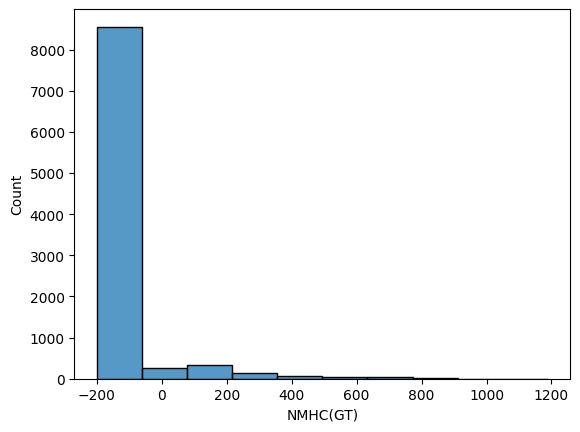

In [19]:
import seaborn as sns

sns.histplot(df_for_processing['NMHC(GT)'], bins=10)

## Task 4
### Збудувати графік залежності одного integer/real атрибута від іншого.

<Axes: xlabel='NMHC(GT)', ylabel='C6H6(GT)'>

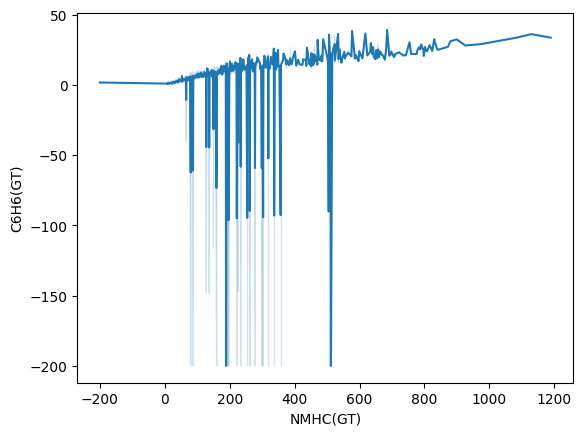

In [20]:
sns.lineplot(df_for_processing[['NMHC(GT)', 'C6H6(GT)']], x='NMHC(GT)', y='C6H6(GT)')

## Task 5
### Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [21]:
pearson = scipy.stats.pearsonr(normalised_data["NMHC(GT)"], normalised_data['C6H6(GT)'])
spearson = scipy.stats.spearmanr(normalised_data["NMHC(GT)"], normalised_data['C6H6(GT)'])

In [22]:
pearson

PearsonRResult(statistic=0.03643654831933906, pvalue=0.00039011764200325757)

In [23]:
spearson

SignificanceResult(statistic=0.025011567705043456, pvalue=0.014926320589032383)

## Task 6
### Провести One Hot Encoding категоріального string атрибуту.

In [24]:
from sklearn.preprocessing import OneHotEncoder
df_for_processing['AH'] = df_for_processing['AH'].astype(str)


ohe = OneHotEncoder(handle_unknown='ignore')
ohe_res = ohe.fit_transform(df_for_processing[['AH']])

ohe_df = pd.DataFrame(ohe_res.toarray(), columns=ohe.get_feature_names_out(['AH']))
df_for_processing = pd.concat([df_for_processing, ohe_df], axis=1)

df_for_processing.drop(['AH'], axis=1, inplace=True)


print(df_for_processing.head(5))

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  AH_normal  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9        1.0   
1        1174.0     92.0        1559.0        972.0  13.3  47.7        1.0   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0        1.0   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0        1.0   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6        1.0   

   AH_unnormal  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


## Task 7
### Провести візуалізацію багатовимірних даних

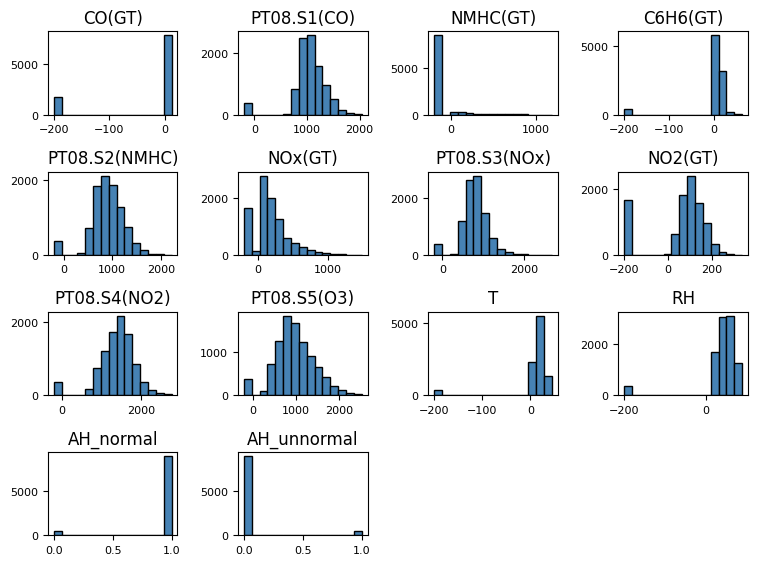

In [25]:
import matplotlib.pyplot as plt

df_for_processing.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

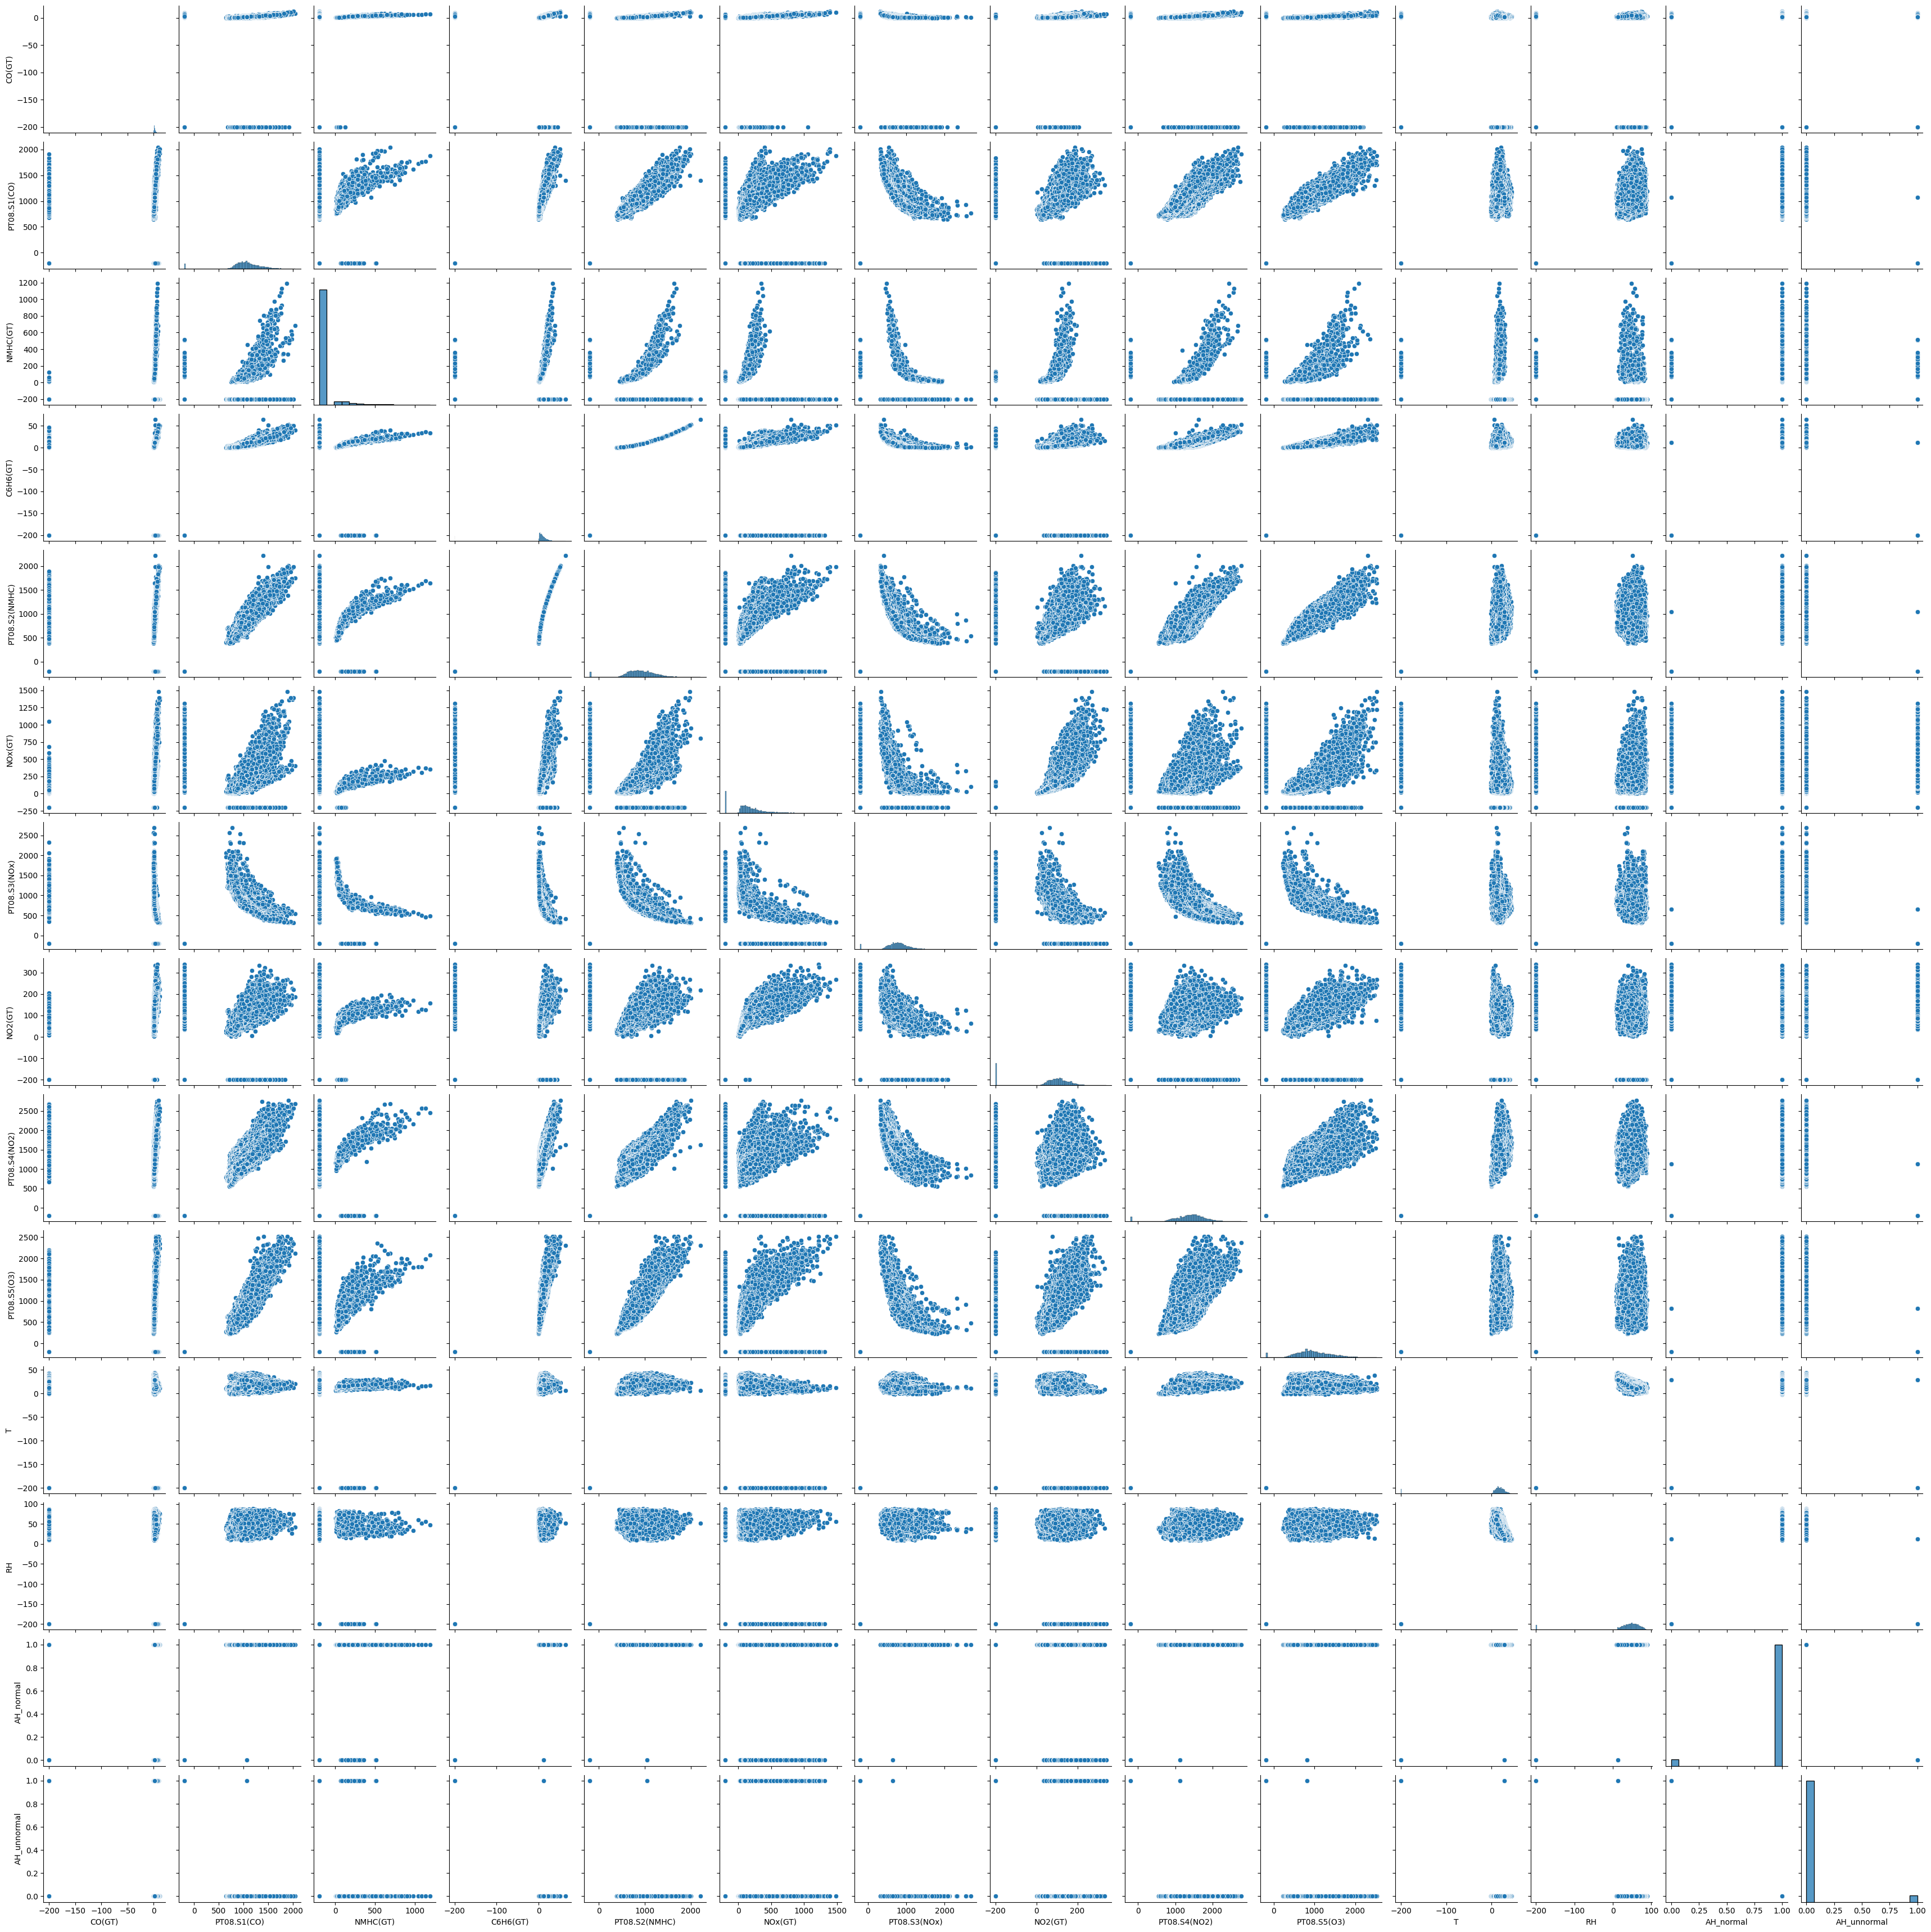

In [26]:
sns.pairplot(df_for_processing)

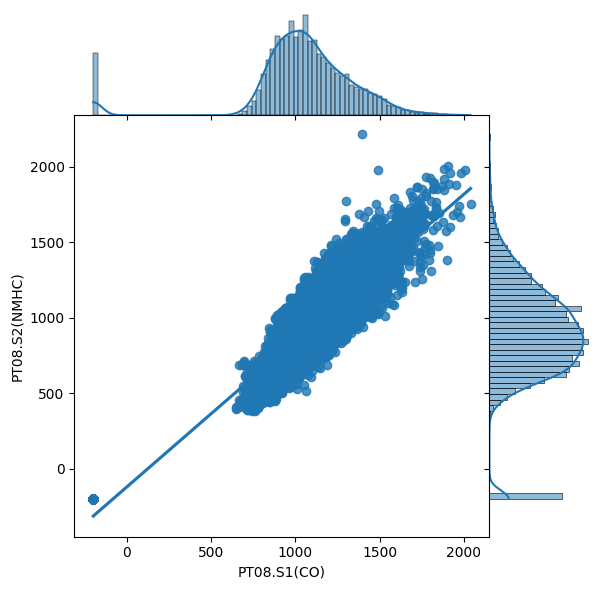

In [27]:
sns.jointplot(x='PT08.S1(CO)', y='PT08.S2(NMHC)', data=df_for_processing,
                   kind='reg', space=0, ratio=4)